# Simulation of standard Snakes and ladders Game
## This program is used to simulate snakes and ladder game to find the average length of the game
** Author: Edwin Ismail **

In [1]:
import random
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# initializing size of the dance
dice = 6


*** snakes and ladders for the game for a snake element [[0]] < element [[1]] and for a ladder element [[0]] < element [[1]] ***

In [2]:
snakes_ladders = [[1, 38], [4, 14], [9, 31], [21, 42], [28, 84], [36, 44], [51, 67], [71, 91], [80, 100], [16, 6], [47, 26], [49, 11], [56, 53], [62, 19],
                  [64, 60], [87, 24], [93, 73], [95, 75], [98, 78]]
#only laddder
#snakes_ladders= [[1, 38], [4, 14], [9, 31], [21, 42], [28, 84], [36, 44], [51, 67], [71, 91], [80, 100]]
#only snakes            
#snakes_ladders=[ [16, 6], [47, 26], [49, 11], [56, 53], [62, 19],[64, 60], [87, 24], [93, 73], [95, 75], [98, 78]]

*** random snake and ladder generator ***


In [3]:
def RandomSnake(numSnake, numLadder):
    randomSnake = []
    countSnake = 0
    countLadder = 0
    s_l_set = set()
    s_l_set.update([])
    while len(randomSnake) < (numSnake+numLadder) :
        x = random.randint(1, 100)
        y = random.randint(1, 100)
        if y > x and countSnake < (numSnake) and y != 100:
            if not y in s_l_set and  not x in s_l_set:
                randomSnake.append([y, x])
                countSnake += 1
        if y < x and countLadder < (numLadder):
            if not y in s_l_set and not x in s_l_set:
                randomSnake.append([y, x])
                countLadder += 1
        for ele in randomSnake:
            s_l_set.update(ele)
    # just verifying if snakes and ladders are unique
    """df=pd.DataFrame(list(s_l_set),columns=['just'])
    print(df['just'].value_counts())"""
    return randomSnake

*** Function for the simulation of the game snakes and ladders ***


In [4]:
def gamesimulation(sl, dice):
    # initialization of parameters count for counting the length of game, path records the step of the game to  completion, token is actual element moving through the game
    count = 0
    path = []
    token = 0
    while token < 100:
        roll = random.randint(1, dice)
        token = token+roll
        count += 1
        if token > 100:
            token = token-roll
        for trans in sl:
            if token == trans[0]:
                token = trans[1]
                break
        path.append(token)
    return [count, path]

*** Function for commanding how many times the game should be played ***


In [5]:
def NumberOfGame(number,snakes):
    countlist = []
    for num in range(0, number):
        countlist.append(gamesimulation(snakes, dice))
    return countlist

*** Function is to presenting the result of the game ***

In [6]:
def results(countlist):
    print("The minimum lenght of the game is {} \n the shortest path is {}".format(
        (min(countlist))[0], (min(countlist))[1]))
    print("The maximum lenght of the game is {} \n the longest path is {}".format(
        (max(countlist))[0], (max(countlist))[1]))
    sums = 0
    for ele in countlist:
        sums += ele[0]
    print("Average length of the game is {}".format(sums/len(countlist)))
    return countlist

In [7]:
def average(countlist):
    sums = 0
    for ele in countlist:
        sums += ele[0]
    return sums/len(countlist)

In [8]:
#playing 100000 games
countlist=results(NumberOfGame(100000,snakes_ladders))

The minimum lenght of the game is 7 
 the shortest path is [14, 17, 22, 84, 90, 96, 100]
The maximum lenght of the game is 306 
 the longest path is [3, 8, 13, 6, 12, 18, 19, 20, 26, 30, 31, 33, 34, 39, 43, 46, 48, 11, 12, 6, 8, 13, 17, 22, 24, 29, 34, 35, 40, 43, 44, 45, 11, 13, 15, 6, 10, 14, 18, 42, 45, 11, 12, 17, 22, 26, 32, 33, 34, 35, 39, 42, 46, 11, 17, 23, 26, 31, 44, 26, 31, 33, 38, 40, 46, 48, 11, 15, 42, 44, 45, 11, 6, 7, 12, 13, 18, 24, 29, 32, 44, 50, 52, 53, 59, 61, 19, 25, 29, 30, 31, 44, 50, 55, 58, 59, 65, 91, 94, 78, 82, 84, 85, 90, 73, 78, 81, 86, 24, 25, 27, 84, 90, 92, 78, 84, 24, 29, 35, 41, 45, 26, 27, 84, 90, 91, 92, 73, 78, 81, 24, 29, 33, 44, 26, 32, 34, 40, 46, 11, 12, 15, 42, 45, 11, 13, 19, 23, 84, 90, 94, 75, 79, 82, 24, 29, 30, 33, 35, 38, 43, 44, 50, 52, 54, 53, 53, 59, 19, 23, 26, 84, 88, 91, 97, 97, 97, 78, 83, 24, 26, 32, 35, 41, 46, 26, 31, 37, 40, 44, 50, 53, 57, 60, 60, 66, 72, 73, 76, 82, 83, 24, 26, 29, 35, 41, 45, 67, 72, 73, 74, 76, 81, 82, 84

*** converting a list to numpy array for ease graph plotting ***

In [9]:
countList=np.array(countlist)

In [10]:
#reshaping array to the shape (100000,)
countList=countList[:,:-1].reshape(100000,)

(0, 306)

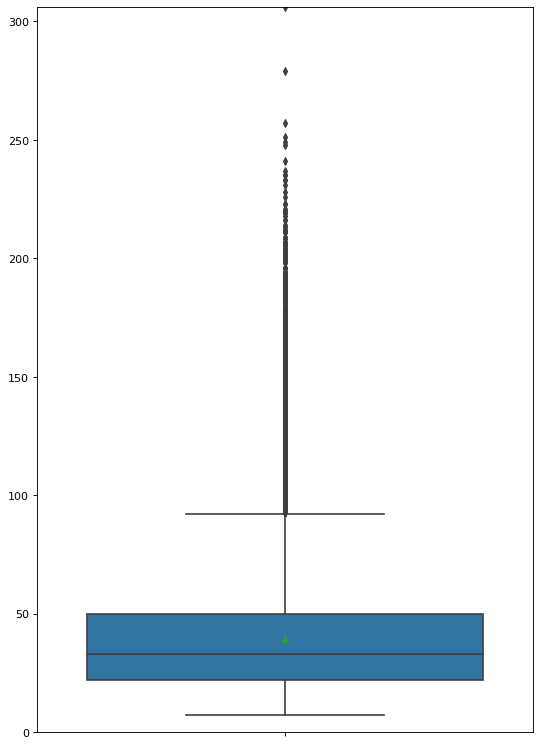

In [11]:
#plotbox 
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
ax = sns.boxplot(countList,orient="v",showmeans=True)
plt.ylim(0,(max(countlist))[0])

Text(0.5, 1.0, 'Simulated Lengths of Chutes & Ladders Games')

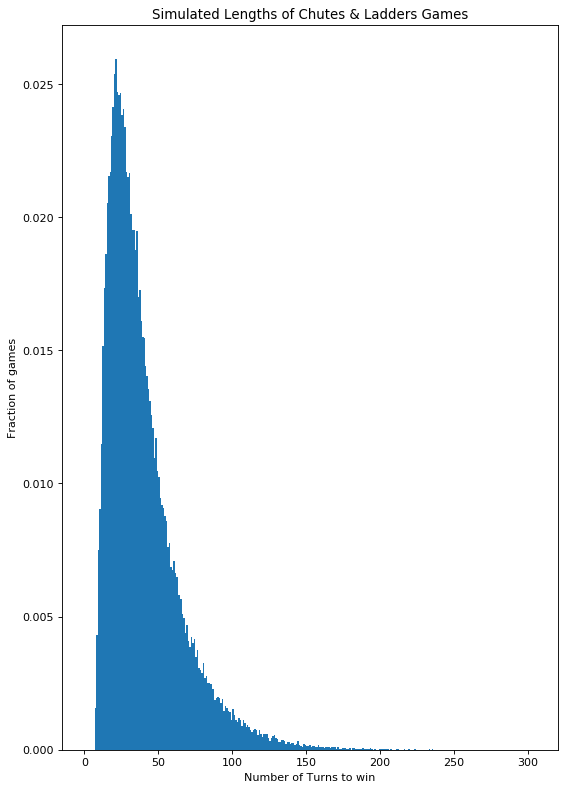

In [12]:
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
plt.hist(countList,bins=range((max(countlist))[0]),density=True)
plt.xlabel('Number of Turns to win')
plt.ylabel('Fraction of games')
plt.title('Simulated Lengths of Chutes & Ladders Games')

In [13]:
df=pd.DataFrame(data=countList,columns=["number of turns"])
df["number of turns"].value_counts()

21     2592
20     2538
22     2471
24     2466
23     2459
       ... 
214       1
213       1
206       1
279       1
306       1
Name: number of turns, Length: 224, dtype: int64

In [14]:
result=[]
for i in range(0,100000):
    result.append(RandomSnake(10,9))

In [15]:
result=np.array(result)
result=result.reshape(3800000)
result


array([42, 40, 85, ..., 66, 90, 22])

*** shows distribution of random snake and ladder

Text(0.5, 1.0, 'distribution of the random snake and ladders')

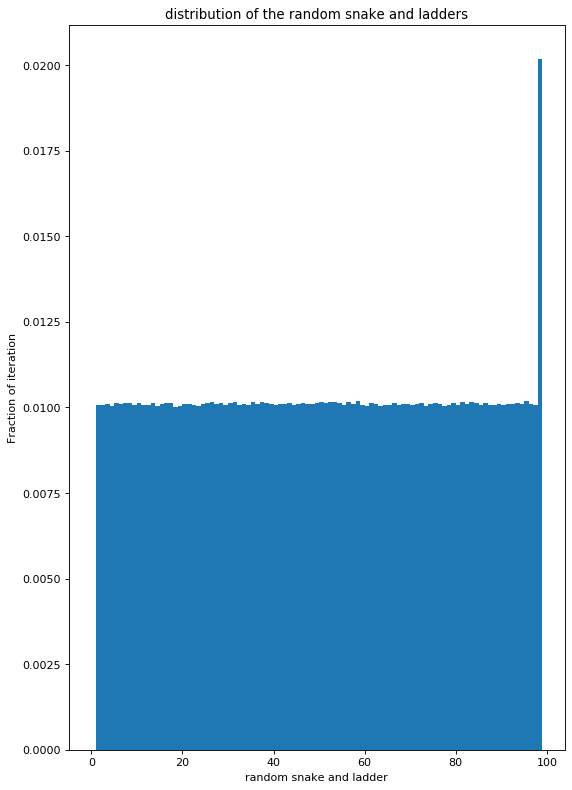

In [16]:
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
plt.hist(result,bins=range((max(result))),density=True)
plt.xlabel('random snake and ladder')
plt.ylabel('Fraction of iteration')
plt.title('distribution of the random snake and ladders')

In [17]:
countlist = results(NumberOfGame(100000,RandomSnake(10,9)))

The minimum lenght of the game is 5 
 the shortest path is [5, 45, 48, 99, 100]
The maximum lenght of the game is 299 
 the longest path is [3, 8, 13, 16, 21, 22, 26, 29, 35, 82, 84, 53, 55, 60, 72, 73, 75, 57, 60, 10, 16, 20, 23, 27, 29, 33, 35, 40, 43, 46, 50, 56, 58, 72, 73, 73, 75, 57, 58, 64, 70, 73, 57, 62, 10, 45, 47, 48, 50, 84, 88, 89, 4, 10, 16, 20, 25, 26, 29, 33, 82, 87, 88, 89, 4, 5, 10, 15, 19, 24, 30, 35, 82, 86, 91, 4, 10, 37, 41, 44, 48, 84, 89, 93, 4, 10, 45, 46, 89, 91, 4, 5, 9, 10, 45, 46, 50, 84, 88, 93, 4, 10, 16, 18, 23, 26, 28, 30, 33, 36, 41, 45, 50, 55, 59, 62, 64, 67, 70, 73, 57, 59, 72, 77, 82, 83, 86, 53, 59, 72, 57, 72, 75, 80, 83, 89, 53, 55, 72, 73, 74, 73, 73, 77, 81, 82, 83, 84, 88, 53, 55, 72, 74, 77, 73, 75, 57, 62, 59, 10, 15, 20, 26, 32, 35, 40, 46, 50, 53, 59, 64, 10, 15, 17, 23, 27, 28, 32, 35, 82, 88, 93, 94, 4, 8, 45, 50, 53, 57, 72, 57, 58, 72, 75, 79, 81, 82, 86, 53, 58, 62, 59, 10, 44, 46, 50, 56, 60, 62, 64, 68, 71, 57, 72, 73, 57, 59, 64, 

In [18]:
countList=np.array(countlist)
countList=countList[:,:-1].reshape(100000,)

*** plot box ***

(0, 299)

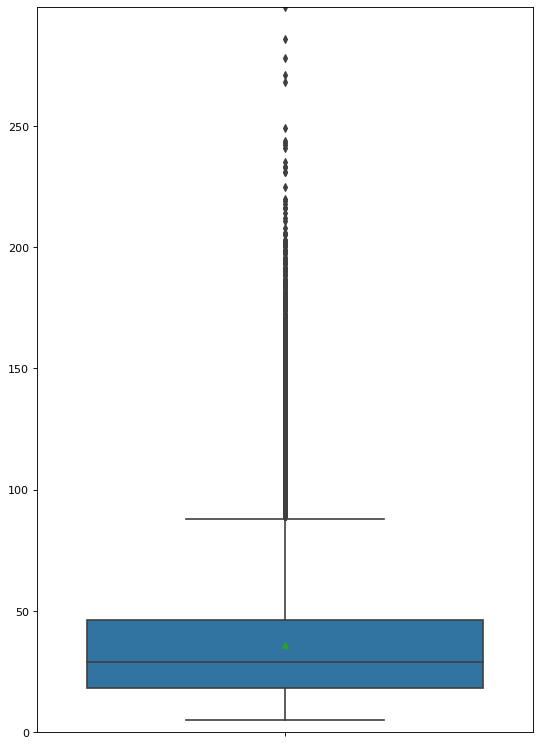

In [19]:
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
ax = sns.boxplot(countList,orient="v",showmeans=True)
plt.ylim(0,(max(countlist))[0])

*** distribution of length of the game against franction of the game ***

Text(0.5, 1.0, 'Simulated Lengths of Chutes & Ladders Games')

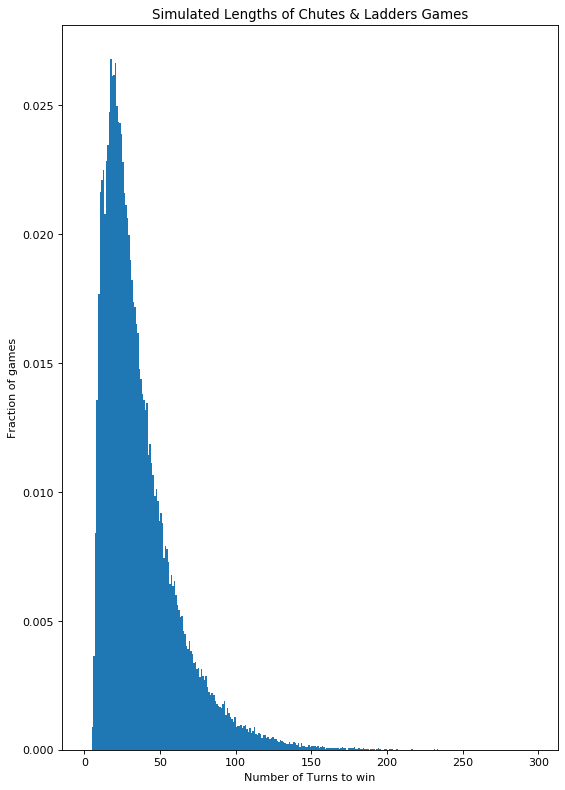

In [20]:
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
plt.hist(countList,bins=range((max(countlist))[0]),density=True)
plt.xlabel('Number of Turns to win')
plt.ylabel('Fraction of games')
plt.title('Simulated Lengths of Chutes & Ladders Games')

In [21]:
acc=[]
for i in range(0,1000):
    acc.append(average(NumberOfGame(100000,RandomSnake(10,9))))

In [22]:
avg=np.array(acc)

(0, 386.10996)

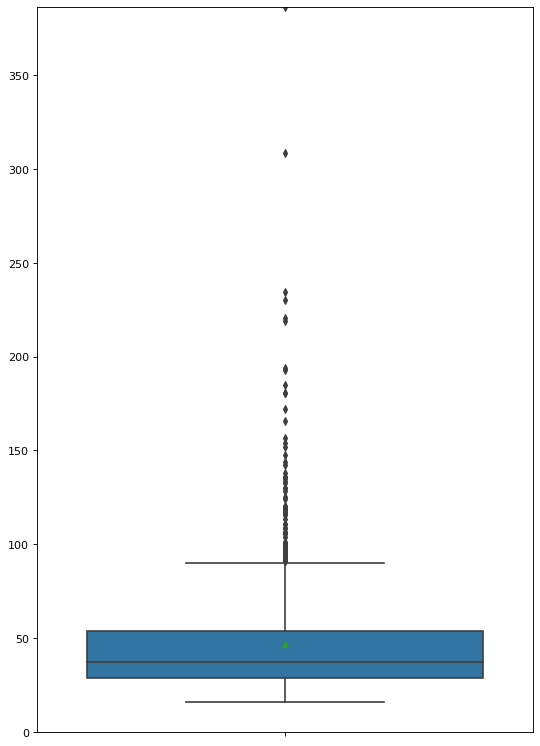

In [23]:
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
ax = sns.boxplot(avg,orient="v",showmeans=True)
plt.ylim(0,(max(avg)))

Text(0.5, 1.0, 'Simulated average length of the game snakes and ladders with random snake and ladder')

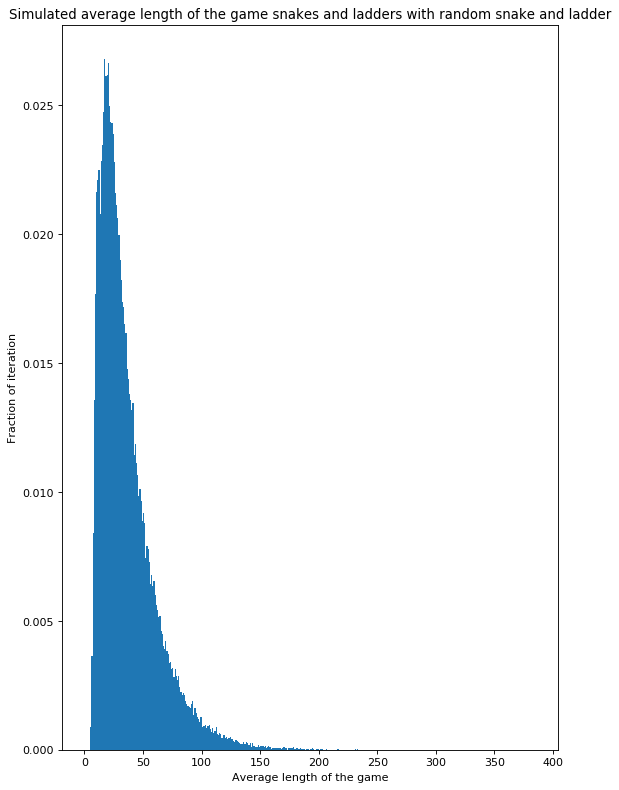

In [24]:
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
plt.hist(countList,bins=range(int((max(avg)))),density=True)
plt.xlabel('Average length of the game')
plt.ylabel('Fraction of iteration')
plt.title('Simulated average length of the game snakes and ladders with random snake and ladder')

In [25]:
avg

array([ 43.23407,  36.65449,  25.413  ,  55.92739,  36.5119 ,  26.24295,
        29.46705,  24.36212,  36.00189,  52.8087 ,  28.07905,  17.78885,
        27.8737 ,  64.68189,  28.27743,  56.31343,  41.07138,  48.45034,
        40.55047,  31.42252,  26.73091,  33.52646,  41.58948,  33.36098,
        42.75977,  27.92976,  36.16415,  54.45755,  67.97212, 101.23095,
        63.83358,  41.15338,  58.76913,  50.46539,  42.51323,  22.21598,
        43.27965,  38.35039,  61.55403,  22.5214 ,  29.99862,  55.22498,
        39.90286,  36.47807,  36.03244,  33.79075,  40.73989,  35.38265,
        17.74331,  43.43589, 234.63602, 128.23567,  30.71373, 218.80242,
        29.97663,  24.84619,  40.8297 ,  27.08493,  25.33261,  46.28441,
        42.8407 , 172.03116,  53.93013,  33.21282,  24.82061,  28.09516,
        34.90732,  29.99558,  50.89664,  20.76263,  37.33443,  38.81832,
        39.83138,  19.11756,  23.39033,  63.36015,  42.1705 ,  28.99574,
        26.61611, 184.74363,  49.17653,  33.95144, 

*** saving average of average length of random snake and ladder ***

In [28]:
import pickle
with open('avg_avg', 'wb') as fp:
    pickle.dump(acc, fp)